In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score,StratifiedKFold, GridSearchCV,RepeatedStratifiedKFold
      
from sklearn import feature_selection as fs
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from scipy import stats

# 1.GATHERING DATA

In [32]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [33]:
data.shape

(4177, 9)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [35]:
header_data  = ['Sex', 'Length', 'Diameter', 'Height',
'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv',header=None,skiprows=1,names=header_data)

In [36]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [37]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


##observation==count is same in every features so probably no null values. ##data problem in HEIGHT .drastic jump in value between 75% and max.similar in shucked_weight

# 2. Some Visual Insights

<AxesSubplot:>

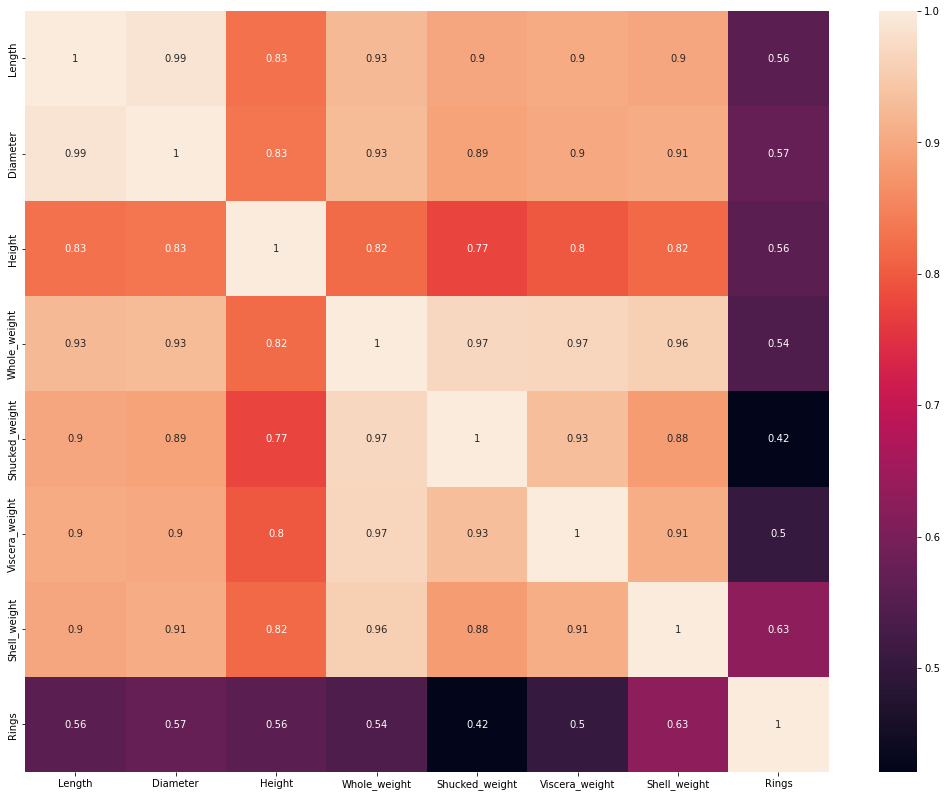

In [38]:
#establising relationship among features anf label.
### plotting heatmap to check correlation

df_corr = data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})

In [39]:
from pandas.plotting import scatter_matrix

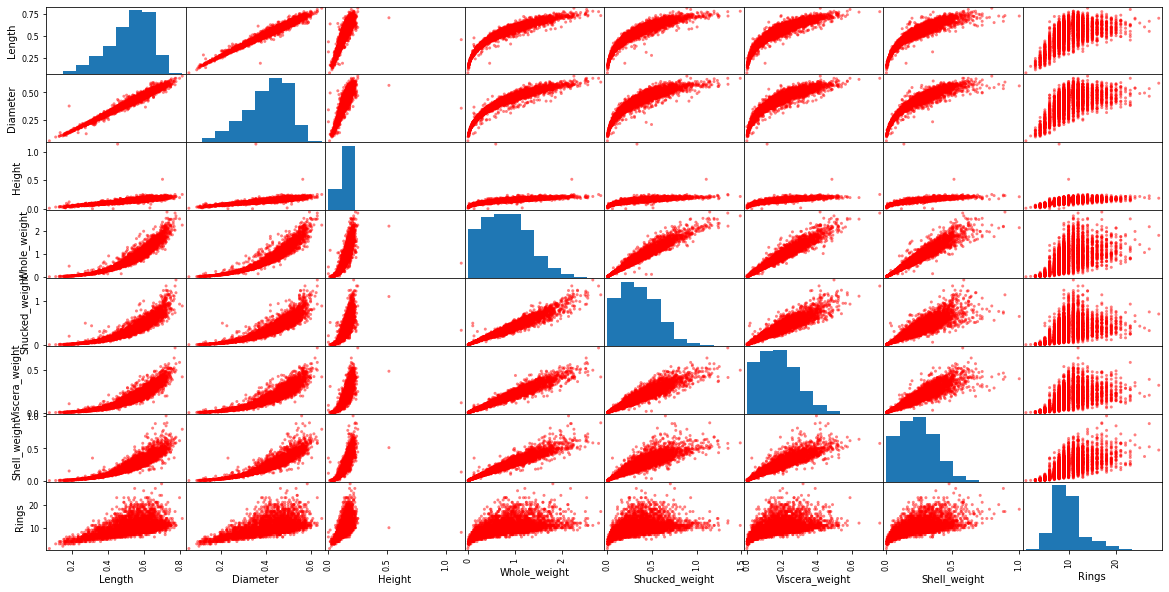

In [40]:
scatter_matrix(data,figsize=(20,10),color="r")
plt.show()

# observation == strong correaltion among features

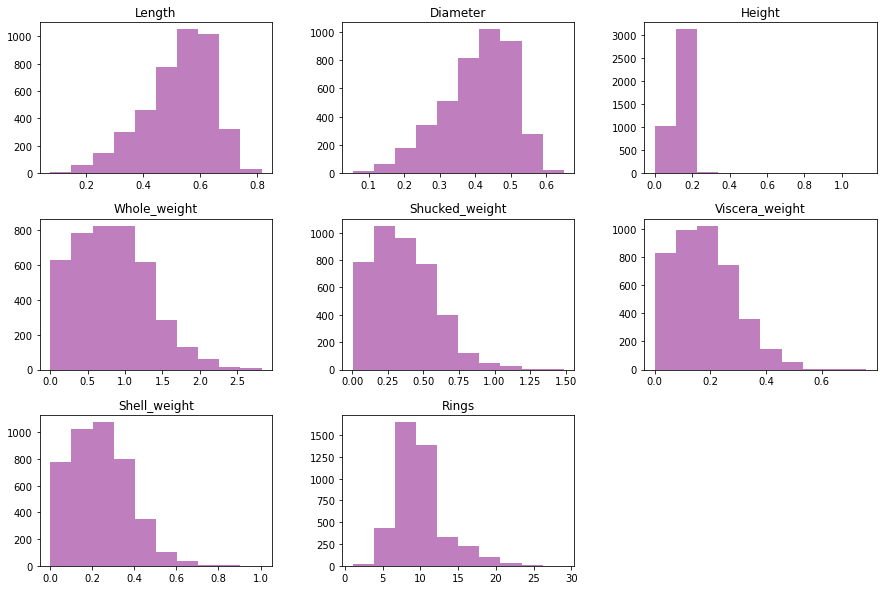

In [41]:
data.hist(figsize=(15,10), grid=False, alpha=0.5, color='purple');

# 3. Handling Missing Data

In [42]:
#checking null value
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

# 4. Feature Extraction

In [43]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [44]:
data.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [45]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df = lab_enc.fit_transform(data['Sex'])
pd.Series(df)

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Length: 4177, dtype: int32

In [46]:
data['Sex']=df
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [47]:
features = data.iloc[:, :-1]
features

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [48]:
df_features=data.drop('Rings',axis=1)

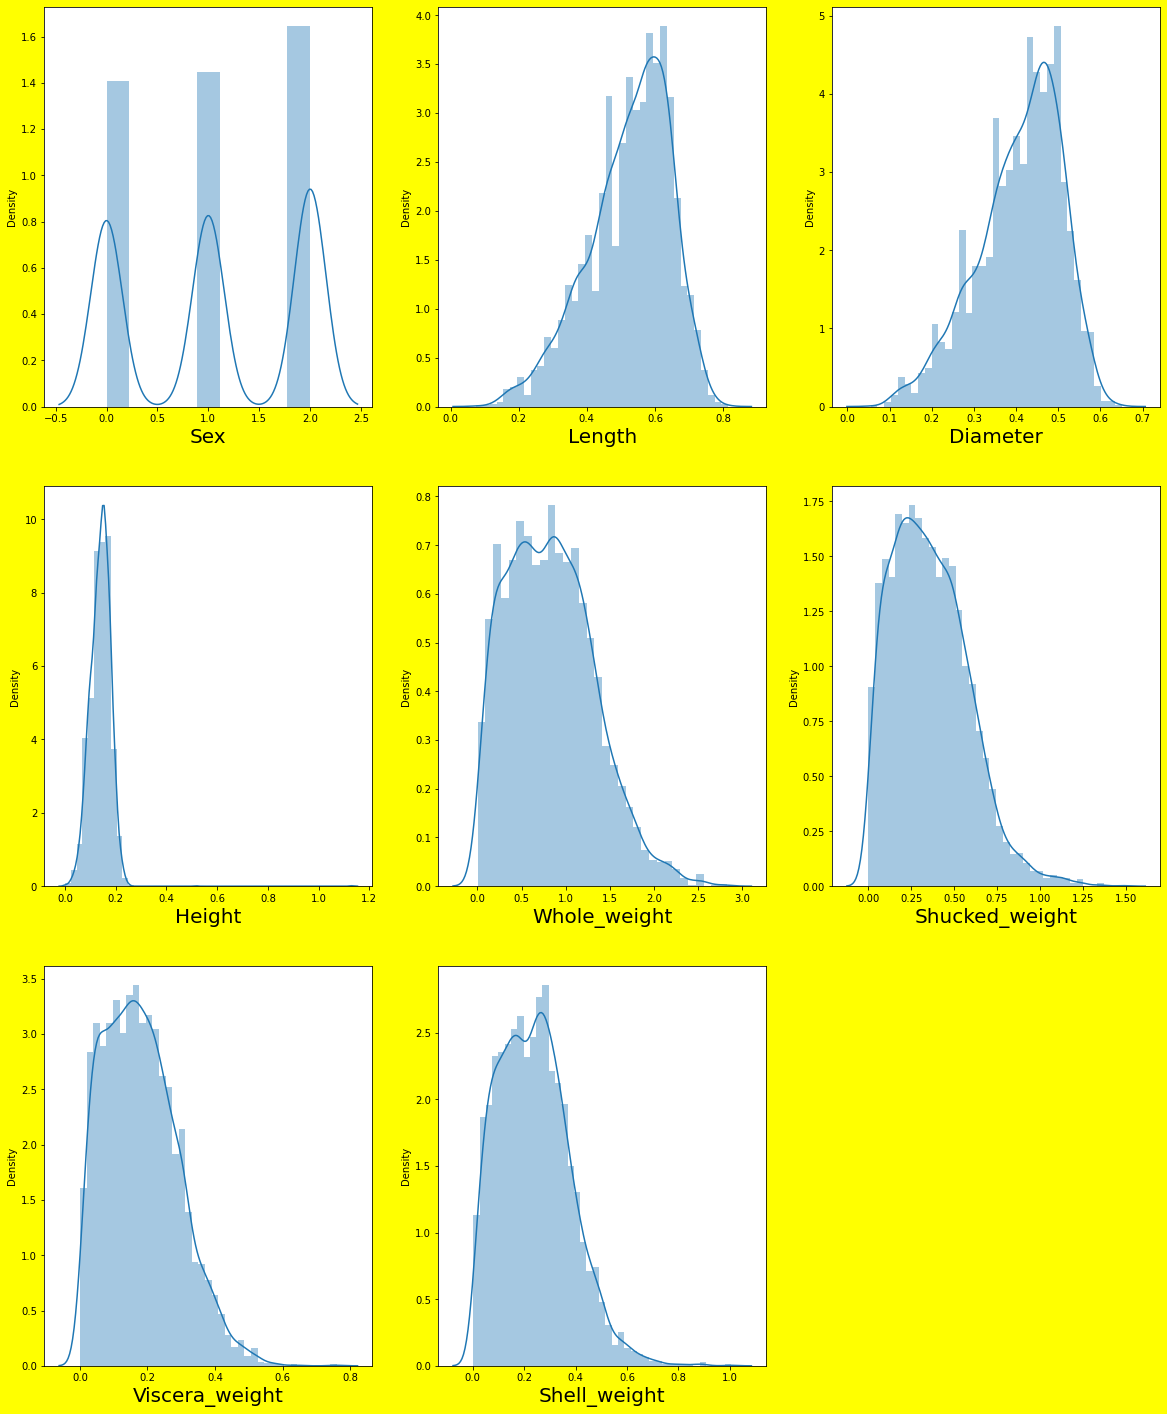

In [49]:
plt.figure(figsize=(20,25),facecolor="yellow")
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

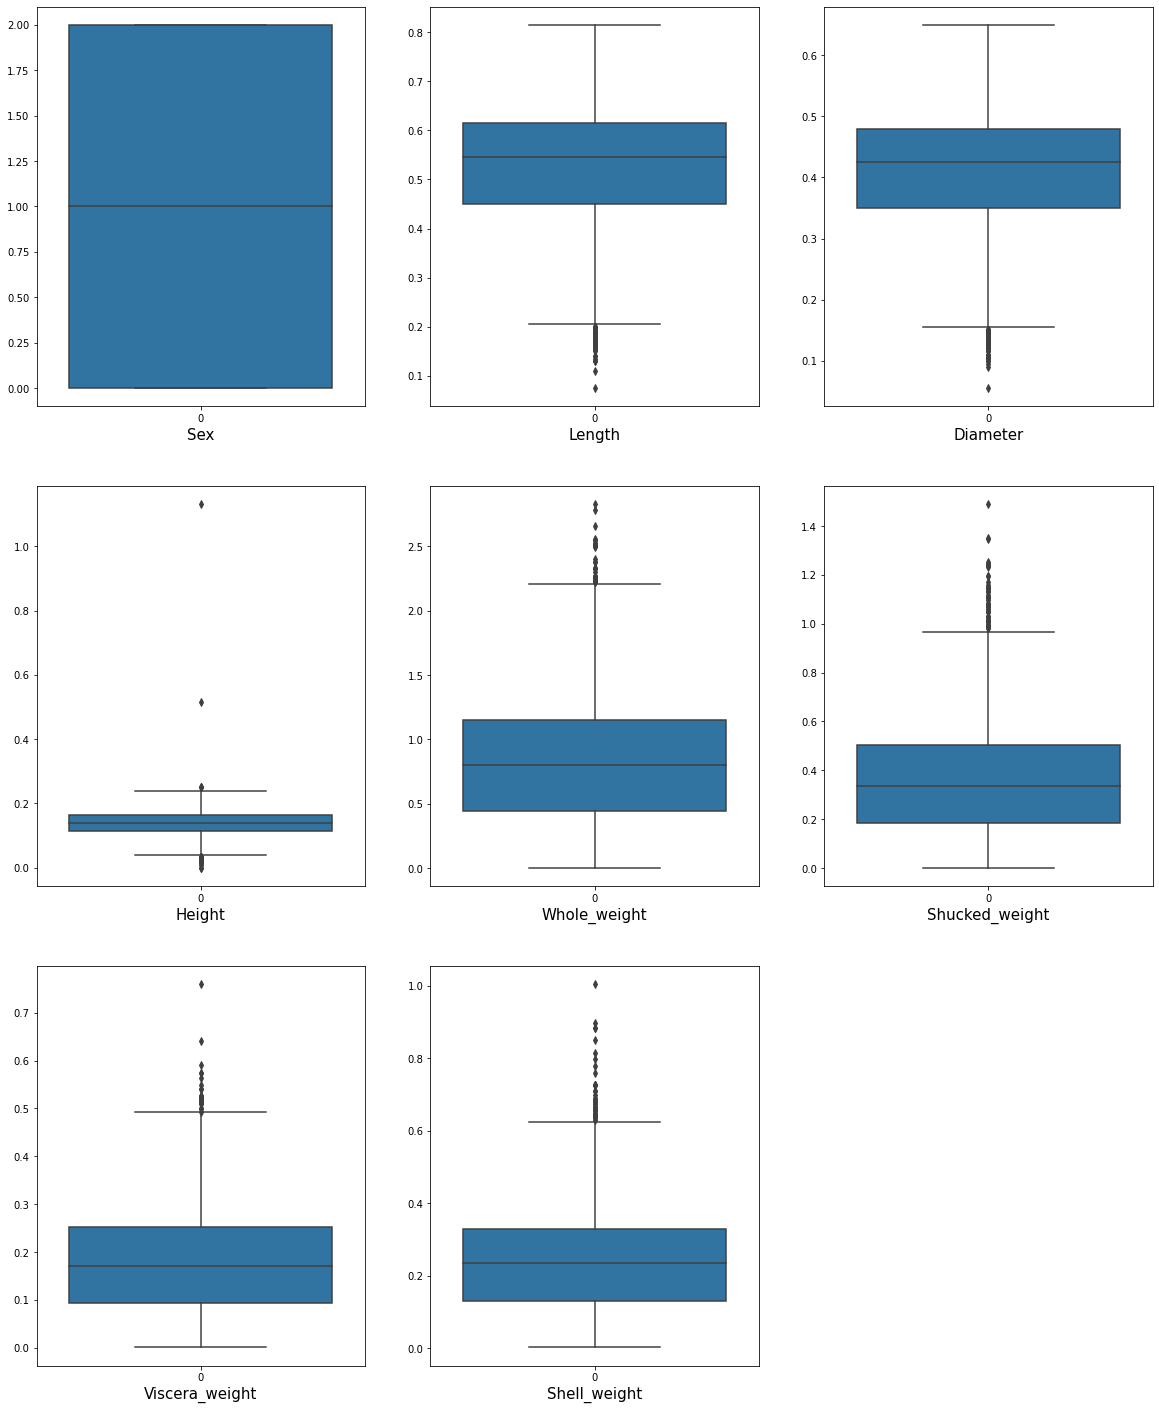

In [51]:
plt.figure(figsize=(20,25))
graph = 1
for column in df_features:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

# observation== in the box plot we see many outliers which we have to remove

In [52]:
data.shape

(4177, 9)

# REMOVING OUTLIERS

In [53]:
data.shape

(4177, 9)

In [54]:
q1 = data.quantile(.25)
q3 = data.quantile(.75)
iqr = q3-q1

In [55]:
length = (q1.Length - (1.5*iqr.Length))
length

0.20250000000000004

In [56]:
index = np.where(data['Length']<length)
index

(array([ 148,  149,  236,  237,  238,  239,  305,  306,  321,  465,  523,
         525,  526,  611,  694,  696,  718,  719,  720, 1053, 1054, 1055,
        1056, 1210, 1429, 1824, 1986, 1987, 2114, 2115, 2169, 2171, 2343,
        2371, 2380, 2381, 2458, 2711, 3141, 3143, 3190, 3318, 3380, 3472,
        3600, 3837, 3899, 3902, 3994], dtype=int64),)

In [58]:
data = data.drop(data.index[index])
data.shape

(4128, 9)

In [59]:
data.reset_index().head()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [60]:
dia = (q1.Diameter - (1.5*iqr.Diameter))
print('dia')
index = np.where(data['Diameter']<dia)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

dia
(4116, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [61]:
height = (q1.Height - (1.5*iqr.Height))
print('height')
index = np.where(data['Height']<height)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()


height
(4113, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [62]:
height = (q3.Height + (1.5*iqr.Height))
print('height')
index = np.where(data['Height']>height)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

height
(4108, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [63]:
w_w = (q3.Whole_weight + (1.5*iqr.Whole_weight))
print('height')
index = np.where(data['Whole_weight']>w_w)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

height
(4080, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [64]:
s_w = (q3.Shucked_weight + (1.5*iqr.Shucked_weight))
print('s_w')
index = np.where(data['Shucked_weight']>s_w)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

s_w
(4056, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [65]:
v_w = (q3.Viscera_weight + (1.5*iqr.Viscera_weight))
print('v_w')
index = np.where(data['Viscera_weight']>v_w)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

v_w
(4048, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [66]:
shell = (q3.Shell_weight + (1.5*iqr.Shell_weight))
print('shell')
index = np.where(data['Shell_weight']>shell)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

shell
(4024, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


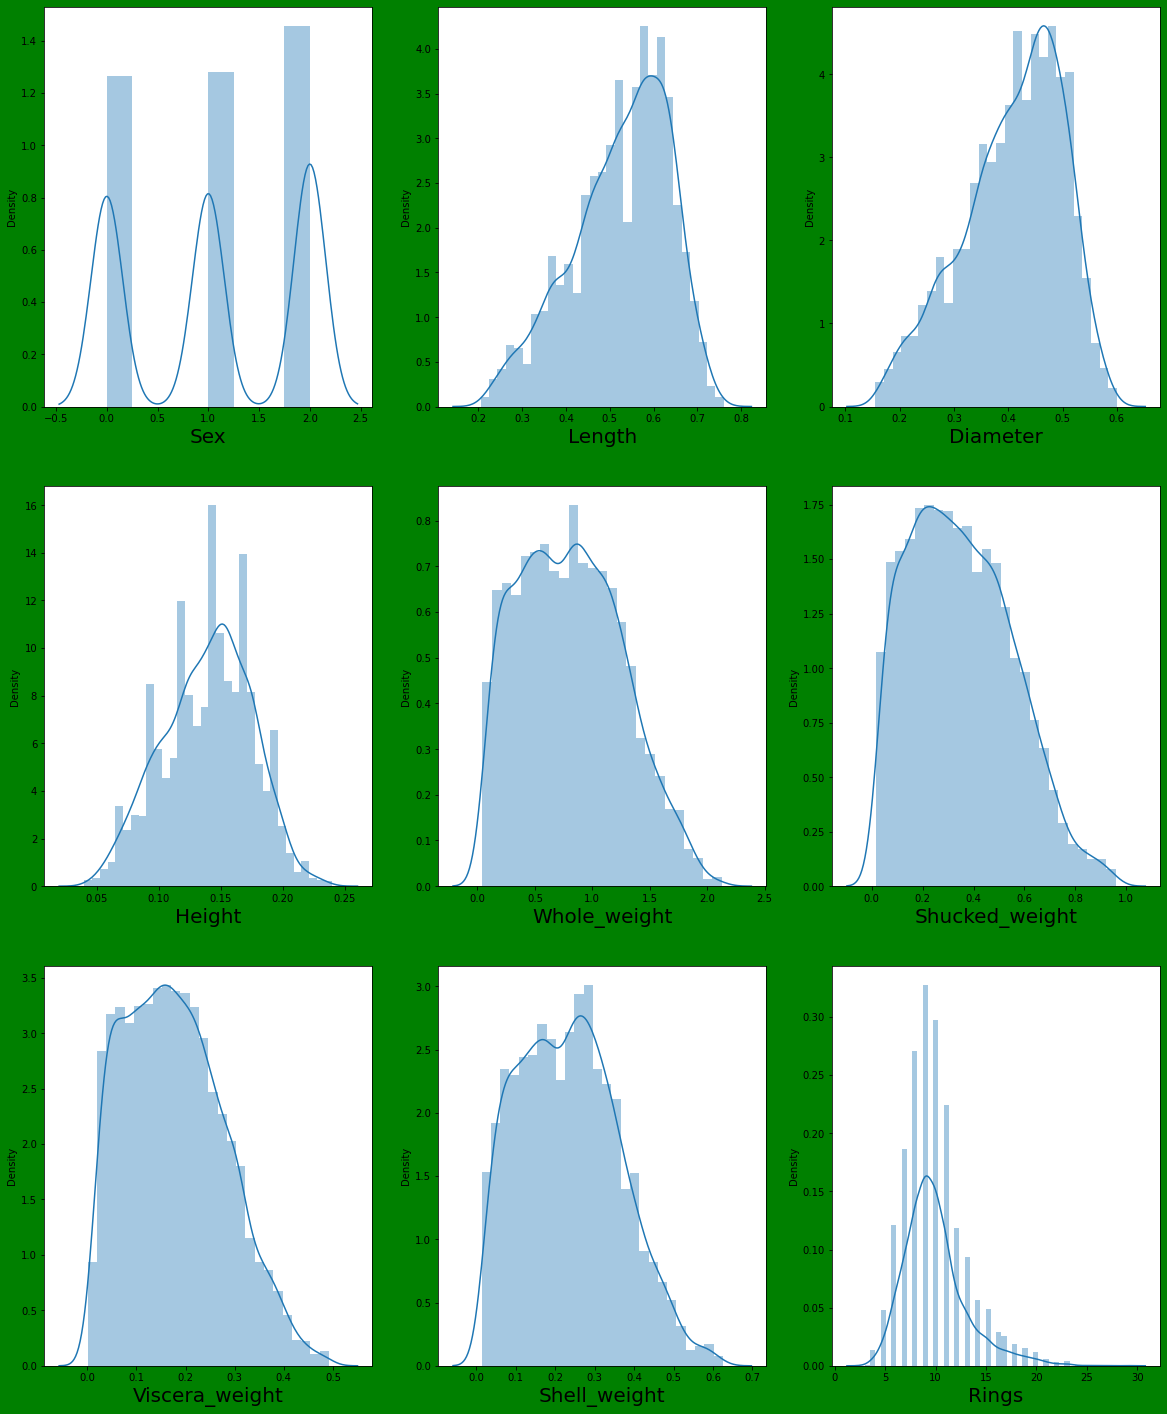

In [67]:
#data distribution
plt.figure(figsize=(20,25),facecolor="green")
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# observation  =  data looks more organised.normal distribution acheived

In [68]:
data.shape

(4024, 9)

# 5) Model Training and Evaluations

In [69]:
X = data.drop(columns=['Rings'])
y = data['Rings']

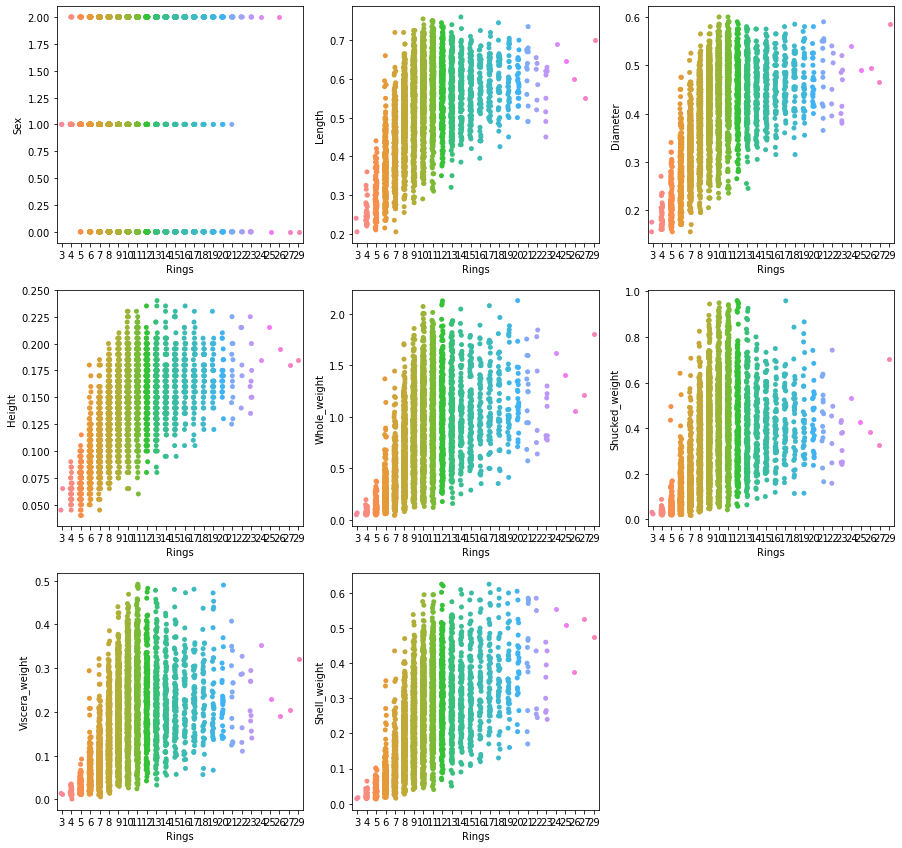

In [70]:
#relationship between independent variables and their categories

plt.figure(figsize = (15,20))
plotnumber = 1

for column in X:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
#checking multicollinearity

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
X_scaled.shape

(4024, 8)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns
vif

,vif,Features
0,1.008434,Sex
1,38.350943,Length
2,39.235580,Diameter
3,6.312365,Height
4,100.136533,Whole_weight
5,26.292316,Shucked_weight
6,16.128044,Viscera_weight
7,22.219643,Shell_weight


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

In [81]:
# fit only training data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# Appluy transforms to both training and test set
Xtrain = scaler.transform(X_train)
Xtest = scaler.transform(X_test)

In [82]:
from sklearn.svm import SVR

svm = SVR(kernel="poly", C=2, gamma="auto", degree=3, epsilon=0.6, coef0=1)
#svm = SVR(kernel="rbf", C=2, gamma="auto", degree=3, epsilon=0.6, coef0=1)
#svm = SVR(kernel="linear", C=10, gamma="auto")
svm.fit(X_train, y_train)

SVR(C=2, coef0=1, epsilon=0.6, gamma='auto', kernel='poly')

In [83]:
svm_preds = np.floor(svm.predict(X_test))

In [84]:
from sklearn.model_selection import cross_validate

cross_validate(svm, X_test, y_test, cv=5)

{'fit_time': array([0.12986755, 0.05795026, 0.05796599, 0.07395267, 0.06096268]),
 'score_time': array([0.00499773, 0.00501418, 0.01997256, 0.0059979 , 0.00499916]),
 'test_score': array([0.47789322, 0.53029253, 0.47007771, 0.53730475, 0.43867173])}

In [85]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, svm_preds)
mae

1.5565217391304347

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_test, y_test)
preds = np.floor(rf.predict(X_test))

In [87]:
cross_validate(rf, X_test, y_test, cv=5)

{'fit_time': array([0.41276336, 0.26484847, 0.28885221, 0.27881861, 0.38477755]),
 'score_time': array([0.01298976, 0.02298665, 0.01299191, 0.02298808, 0.02498698]),
 'test_score': array([0.40150349, 0.31206696, 0.3527612 , 0.34506629, 0.364875  ])}

In [88]:
mae = mean_absolute_error(y_test, preds)
mae

1.706832298136646

In [89]:
from sklearn.linear_model import SGDRegressor

sgd = RandomForestRegressor(max_depth=2, random_state=0)
sgd.fit(X_test, y_test)
preds = np.floor(sgd.predict(X_test))

In [90]:
cross_validate(sgd, X_test, y_test, cv=5)

{'fit_time': array([0.26386356, 0.21285892, 0.26884818, 0.21086311, 0.22087073]),
 'score_time': array([0.01199245, 0.01600957, 0.0139904 , 0.01399159, 0.01999426]),
 'test_score': array([0.40150349, 0.31206696, 0.3527612 , 0.34506629, 0.364875  ])}

In [91]:
mae = mean_absolute_error(y_test, preds)
mae

1.706832298136646

In [92]:
from sklearn.neighbors import KNeighborsRegressor as nn

knn = nn(8, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [93]:
preds = np.floor(knn.predict(X_test))

In [94]:
cross_validate(knn, X_test, y_test, cv=5)

{'fit_time': array([0.00399828, 0.00199747, 0.0040133 , 0.00299907, 0.00199819]),
 'score_time': array([0.00300217, 0.00401592, 0.07795525, 0.00199842, 0.00298023]),
 'test_score': array([0.39630557, 0.42454919, 0.35443341, 0.45032892, 0.39996247])}

In [95]:
mae = mean_absolute_error(y_test, preds)
mae

1.6385093167701863

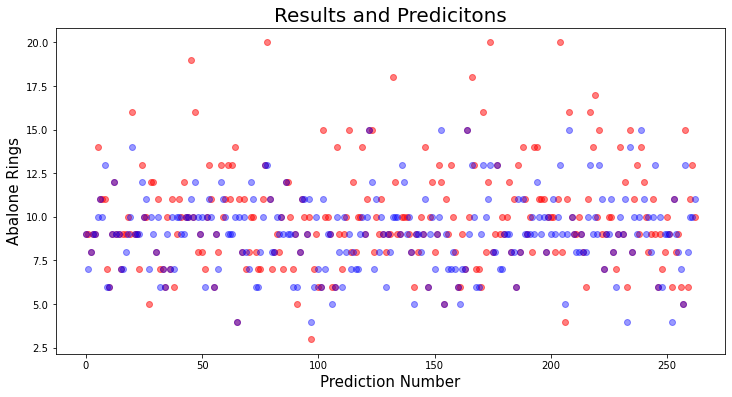

In [97]:
npoints = len(X_test)
graph_points = np.random.randint(npoints)
xdata = range(len(X_test[:graph_points]))
ydata = y_test[:graph_points]
ypreds = svm_preds[:graph_points]
plt.figure(figsize=(12, 6))
plt.title("Results and Predicitons", size=20)
plt.xlabel('Prediction Number', size=15)
plt.ylabel('Abalone Rings', size=15)
plt.scatter(xdata, ydata, color='red', alpha=0.5)
plt.scatter(xdata, ypreds, color='blue', alpha=0.4)
plt.show()

# 6) Model Saving and Loading

In [98]:
import pickle


filename = 'model.pkl'
pickle.dump(svm, open(filename, 'wb'))

In [99]:
# load the model from disk
model = pickle.load(open('model.pkl', 'rb'))
preds = np.floor(model.predict(X_test))

In [100]:
assert(len(preds) == ((preds == svm_preds) == True).sum())

In [101]:
Xtest[0]

array([1.15737883, 0.40679408, 0.50659136, 1.00222578, 0.46663733,
       0.63705384, 0.36763697, 0.44438183])